<a href="https://colab.research.google.com/github/ADNANAHMAD1527/CodSoft/blob/main/SalesPrediction/SalesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SALES PREDICTION USING PYTHON**

**Task: Predicting future sales in given dataset using Python.**

**Given: Advertising dataset consist of the advertising platform and related sales.**

In [ ]:
#Importing essential libraries for our project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset


In [ ]:
df = pd.read_csv('adv.csv')
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


**EDA**

In [ ]:
#Total number of rows and columns in dataframe
df.shape

(200, 4)

In [ ]:
#Getting statistical information from dataframe
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000



* Average expense spend is highest on TV and lowest on radio.
* Maximum sale is 27 and minimum sale is 1.6.


In [ ]:
#Checking null values from dataset
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**Visualizing the data**

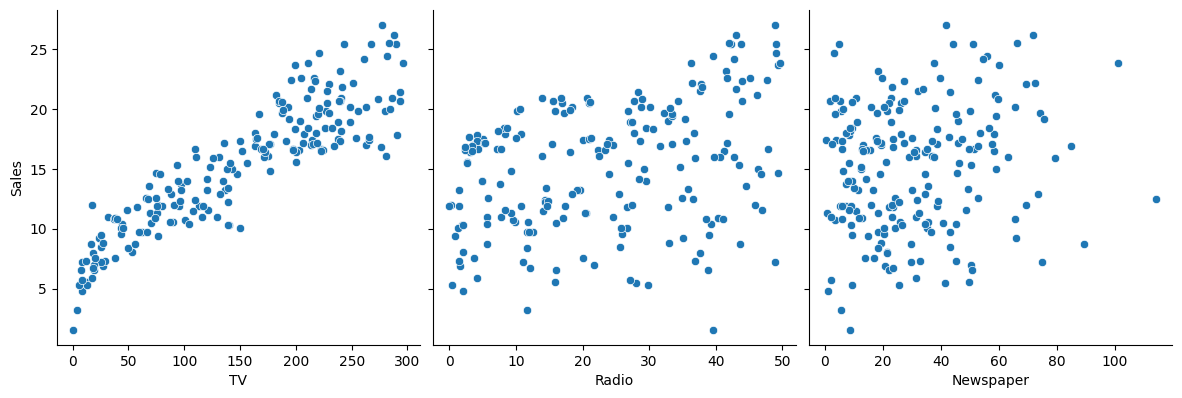

In [ ]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

**Pairplot observation:**
When advertising cost increases then sales also increases in case of TV but in case of radio and newspaper it is unpredictable.

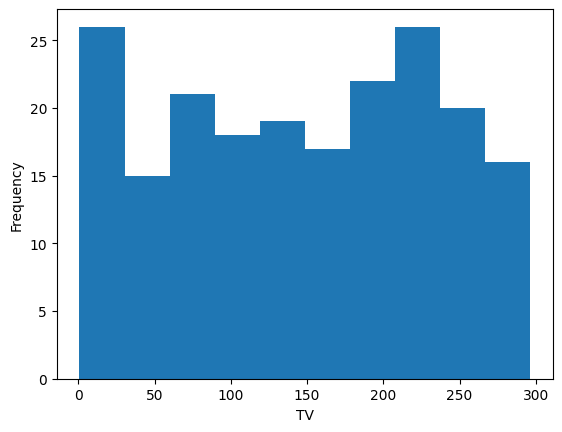

In [ ]:
#Histogram visualization
df['TV'].plot.hist(bins=10, xlabel="TV")
plt.show()

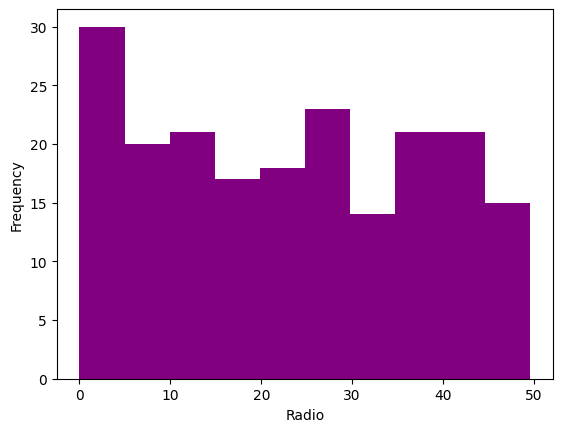

In [ ]:
df['Radio'].plot.hist(bins=10, color="purple", xlabel="Radio")
plt.show()

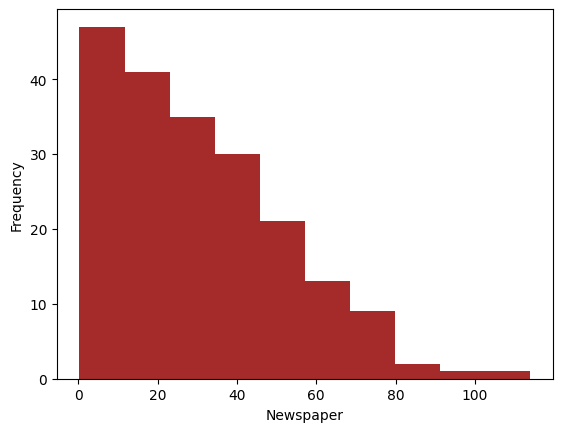

In [ ]:
df['Newspaper'].plot.hist(bins=10, color="brown", xlabel="Newspaper")
plt.show()

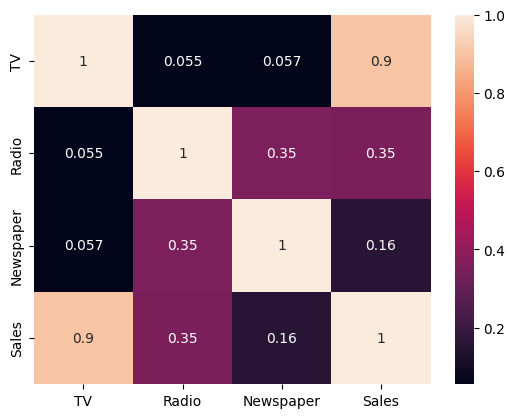

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

Observation:
Sales is highly correlated with TV.

**Training the model**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['TV']], df['Sales'], test_size=0.2, random_state=0)

In [ ]:
print(X_train)

        TV
134   36.9
66    31.5
26   142.9
113  209.6
168  215.4
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[160 rows x 1 columns]


In [ ]:
print(y_train)

134    10.8
66     11.0
26     15.0
113    20.9
168    17.1
       ... 
67     13.4
192     5.9
117     9.4
47     23.2
172     7.6
Name: Sales, Length: 160, dtype: float64


In [ ]:
print(X_test)

        TV
18    69.2
170   50.0
107   90.4
98   289.7
177  170.2
182   56.2
5      8.7
146  240.1
12    23.8
152  197.6
61   261.3
125   87.2
180  156.6
154  187.8
80    76.4
7    120.2
33   265.6
130    0.7
37    74.7
74   213.4
183  287.6
145  140.3
45   175.1
159  131.7
60    53.5
123  123.1
179  165.6
185  205.0
122  224.0
44    25.1
16    67.8
55   198.9
150  280.7
111  241.7
22    13.2
189   18.7
129   59.6
4    180.8
83    68.4
106   25.0


In [ ]:
print(y_test)

18     11.3
170     8.4
107    12.0
98     25.4
177    16.7
182     8.7
5       7.2
146    18.2
12      9.2
152    16.6
61     24.2
125    10.6
180    15.5
154    20.6
80     11.8
7      13.2
33     17.4
130     1.6
37     14.7
74     17.0
183    26.2
145    10.3
45     16.1
159    12.9
60      8.1
123    15.2
179    17.6
185    22.6
122    16.6
44      8.5
16     12.5
55     23.7
150    16.1
111    21.8
22      5.6
189     6.7
129     9.7
4      17.9
83     13.6
106     7.2
Name: Sales, dtype: float64


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
res=model.predict(X_test)
print(res)

[10.92912965  9.88399105 12.08313684 22.93189318 16.42699412 10.22148373
  7.63585439 20.23195181  8.45781235 17.91849399 21.38595901 11.90894708
 15.68668762 17.38503783 11.32105662 13.70527904 21.62002651  7.20037998
 11.22851831 18.77855596 22.81758114 14.7994085  16.6937222  14.33127351
 10.07451111 13.86313851 16.17659633 18.32130782 19.35555956  8.52857694
 10.85292163 17.98925858 22.44198446 20.3190467   7.88080875  8.18019741
 10.40656035 17.00399772 10.88558221  8.52313351]


In [ ]:
model.coef_

array([0.0544343])

In [ ]:
model.intercept_

7.162275968528906

In [ ]:
0.0544343*69.2+7.162275968528906

10.929129528528906

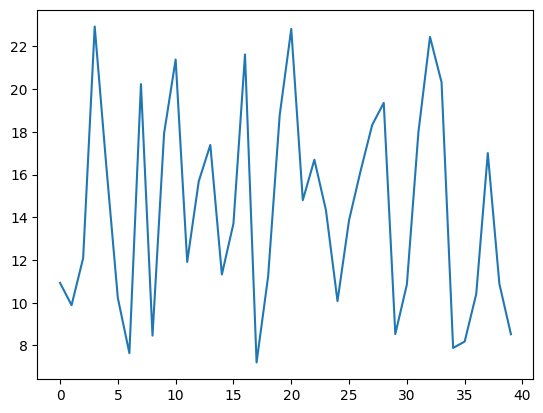

In [ ]:
plt.plot(res)
plt.show()

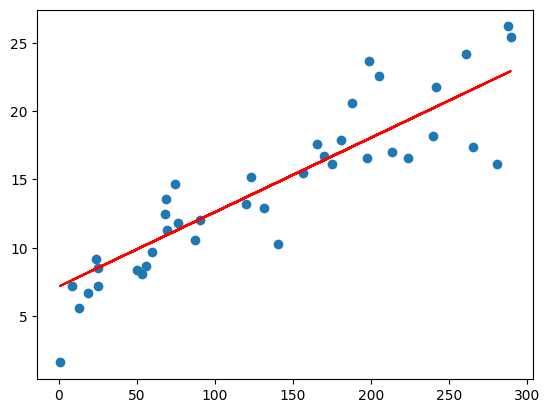

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test,7.162275968528906+0.0544343* X_test, 'red')
plt.show()

**The solution mentioned above is successfully able to predict the sales using advertising dataset.**